In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
start ='2010-01-01'
end = '2022-01-01'
aapl = yf.Ticker("AAPL")

# Fetch historical data
df = aapl.history(start=start, end=end)

# Print the first few rows of the DataFrame
print(df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.437012  6.469283  6.405345  6.454505  493729600   
2010-01-05 00:00:00-05:00  6.472299  6.502157  6.431582  6.465663  601904800   
2010-01-06 00:00:00-05:00  6.465664  6.491300  6.356184  6.362819  552160000   
2010-01-07 00:00:00-05:00  6.386343  6.393883  6.304911  6.351055  477131200   
2010-01-08 00:00:00-05:00  6.342613  6.393886  6.305216  6.393282  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.437012,6.469283,6.405345,6.454505,493729600,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.472299,6.502157,6.431582,6.465663,601904800,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.465664,6.491300,6.356184,6.362819,552160000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.386343,6.393883,6.304911,6.351055,477131200,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.342613,6.393886,6.305216,6.393282,447610800,0.0,0.0


In [5]:
df = df.drop(['Date'], axis = 1 )
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,6.437012,6.469283,6.405345,6.454505,493729600,0.0,0.0
1,6.472299,6.502157,6.431582,6.465663,601904800,0.0,0.0
2,6.465664,6.491300,6.356184,6.362819,552160000,0.0,0.0
3,6.386343,6.393883,6.304911,6.351055,477131200,0.0,0.0
4,6.342613,6.393886,6.305216,6.393282,447610800,0.0,0.0


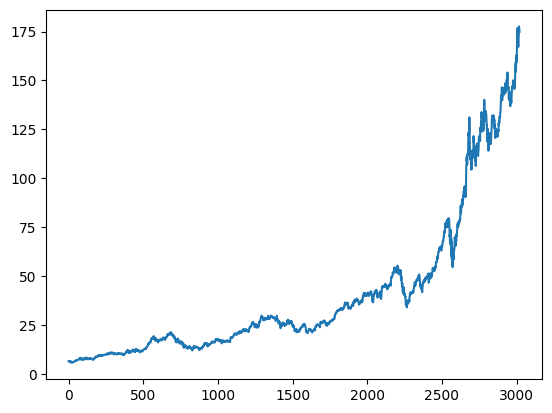

In [6]:
#plt.plot(df.Open)
plt.plot(df.Close)
#plt.plot(df.Volume)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3016    150.899118
3017    151.220847
3018    151.550348
3019    151.868717
3020    152.185701
Name: Close, Length: 3021, dtype: float64

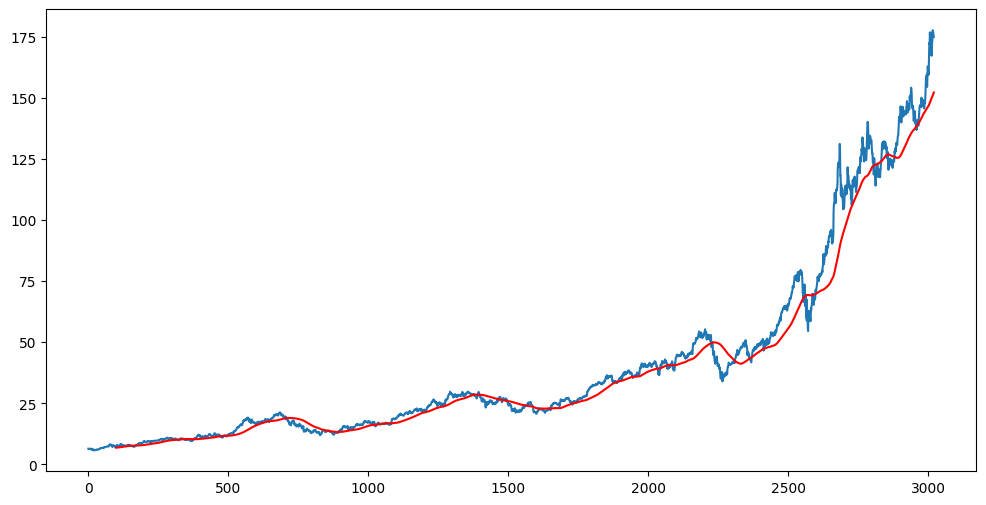

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3016    140.405087
3017    140.680264
3018    140.948140
3019    141.214175
3020    141.497843
Name: Close, Length: 3021, dtype: float64

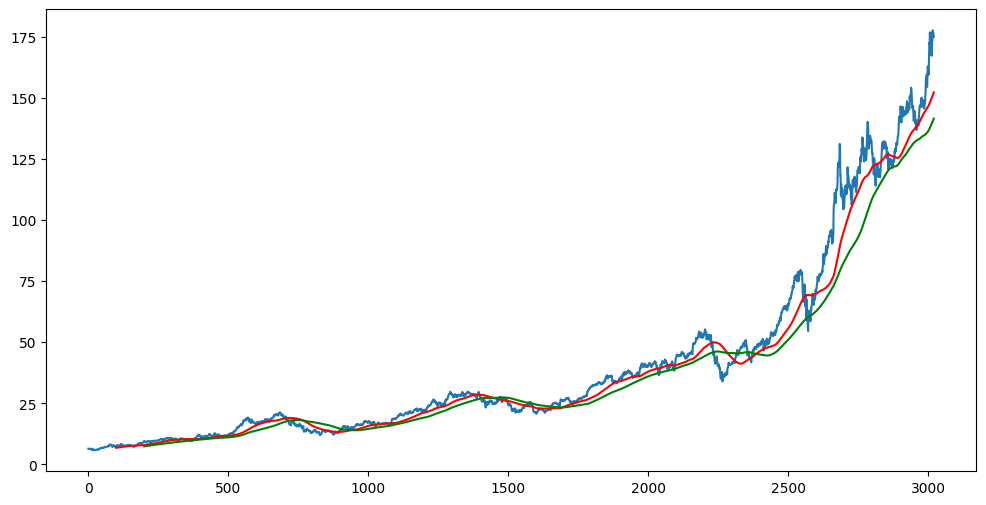

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(3021, 7)

In [12]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(907, 1)


In [13]:
data_training.head()

,Close
0,6.454505
1,6.465663
2,6.362819
3,6.351055
4,6.393282


In [14]:
data_testing.head()

,Close
2114,44.604065
2115,44.509113
2116,44.359558
2117,45.159542
2118,45.536980


In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.01691866],
       [0.01720371],
       [0.01457655],
       ...,
       [0.99423945],
       [0.99296602],
       [0.99557339]])

In [18]:
data_training_array.shape

(2114, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [20]:
x_train.shape

(2014, 100, 1)

In [21]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [22]:
#Machine Learning Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - loss: 0.0577
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0070
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0076
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0064
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0064
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0047
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0043
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 0.0043
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0037
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 0.0043
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 0.0047
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0047
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0038
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0036
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step -

In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()

,Close
2114,44.604065
2115,44.509113
2116,44.359558
2117,45.159542
2118,45.536980


In [32]:
past_100_days = data_training.tail(100)
past_100_days

,Close
2014,40.561867
2015,40.750282
2016,41.214230
2017,41.061146
2018,41.056442
...,...
2109,44.539963
2110,44.428402
2111,44.713264
2112,44.663414


In [33]:
final_df = past_100_days._append(data_testing, ignore_index = True)

In [34]:
final_df.head()

,Close
0,40.561867
1,40.750282
2,41.214230
3,41.061146
4,41.056442


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04575654],
       [0.04706836],
       [0.05029854],
       ...,
       [0.9934853 ],
       [0.98539287],
       [0.98107293]])

In [36]:
input_data.shape

(1007, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [39]:
#Predition system model

y_predicted = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


In [40]:
y_predicted.shape

(907, 1)

In [41]:
y_test

array([0.07389987, 0.07323879, 0.07219752, 0.07776732, 0.08039519,
       0.0828412 , 0.08394849, 0.0830891 , 0.08018027, 0.07940351,
       0.0811389 , 0.07852756, 0.07869278, 0.07545339, 0.07528819,
       0.0702473 , 0.07158599, 0.06986715, 0.06897468, 0.0644297 ,
       0.06816485, 0.06771863, 0.06993331, 0.06928869, 0.07270988,
       0.06732194, 0.06976798, 0.07401557, 0.07832924, 0.07794915,
       0.07386678, 0.07907295, 0.07956879, 0.07887461, 0.07976711,
       0.07803169, 0.08047779, 0.07975062, 0.08003153, 0.08232889,
       0.08533685, 0.08432868, 0.07899035, 0.0772219 , 0.07784992,
       0.09637724, 0.10611187, 0.10710349, 0.10888849, 0.1056491 ,
       0.10588046, 0.10857443, 0.10754613, 0.10976849, 0.11122814,
       0.11204083, 0.11714913, 0.12421451, 0.12069837, 0.12000177,
       0.12001839, 0.12074819, 0.12185938, 0.12481154, 0.12773055,
       0.13317065, 0.13657071, 0.14088278, 0.14209352, 0.1396223 ,
       0.13336966, 0.13038428, 0.12545839, 0.13461352, 0.13000

In [42]:
y_predicted

array([[0.10819797],
       [0.10958815],
       [0.11073095],
       [0.11163013],
       [0.11230627],
       [0.11279599],
       [0.11314875],
       [0.11342135],
       [0.11367185],
       [0.11395147],
       [0.11429703],
       [0.11472893],
       [0.11525126],
       [0.11585212],
       [0.11650588],
       [0.11717606],
       [0.11781982],
       [0.11839214],
       [0.11885136],
       [0.11916283],
       [0.11930105],
       [0.11924975],
       [0.11900645],
       [0.11858425],
       [0.11801142],
       [0.11732826],
       [0.1165823 ],
       [0.11582048],
       [0.115087  ],
       [0.11442357],
       [0.11386831],
       [0.11345133],
       [0.11319125],
       [0.11309695],
       [0.11316749],
       [0.11339249],
       [0.1137532 ],
       [0.11422396],
       [0.11477572],
       [0.11537793],
       [0.11600167],
       [0.11662365],
       [0.11722846],
       [0.11780602],
       [0.11834686],
       [0.11884049],
       [0.11928259],
       [0.119

In [43]:
scaler.scale_

array([0.00696238])

In [44]:
scale_factor = 1/0.00082576
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

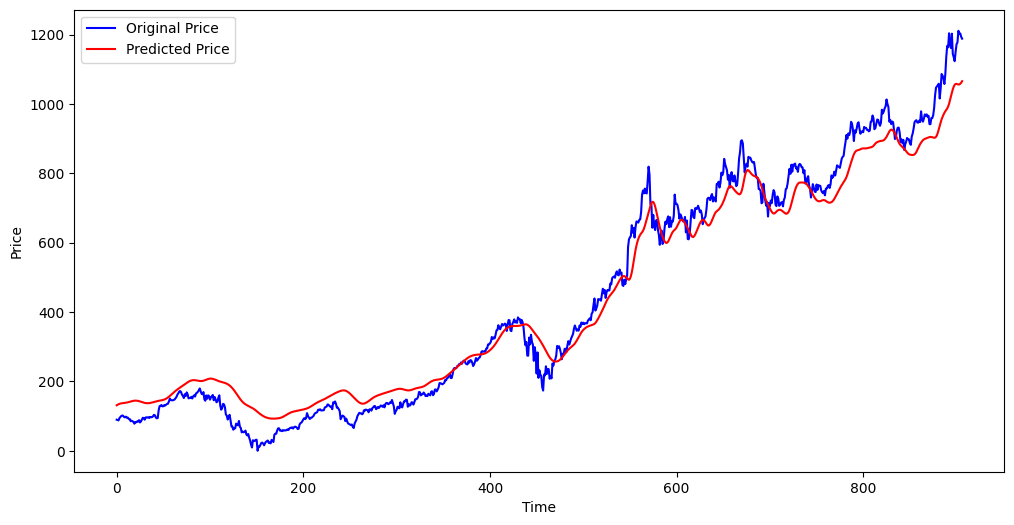

In [45]:
plt.figure(figsize =(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()